# Time Series Analysis 
Check out Google trends data of keywords 'diet', 'gym', and 'finance' to see how they vary over time. Are there more searches for these terms in any specific months? Cover concepts such as seasonality, trends, correslation....

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

In [17]:
data=pd.read_csv('https://tinyurl.com/MyTimeSeriesData', skiprows=1, sep=',')

In [18]:
data.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [20]:
data.shape

(168, 4)

In [21]:
data.columns=['month', 'diet', 'gym', 'finance']

In [22]:
data.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


'month' column is object, we need to switch it to time data

In [23]:
data.month=pd.to_datetime(data.month)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


In [26]:
data.set_index('month', inplace=True)

In [27]:
data.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


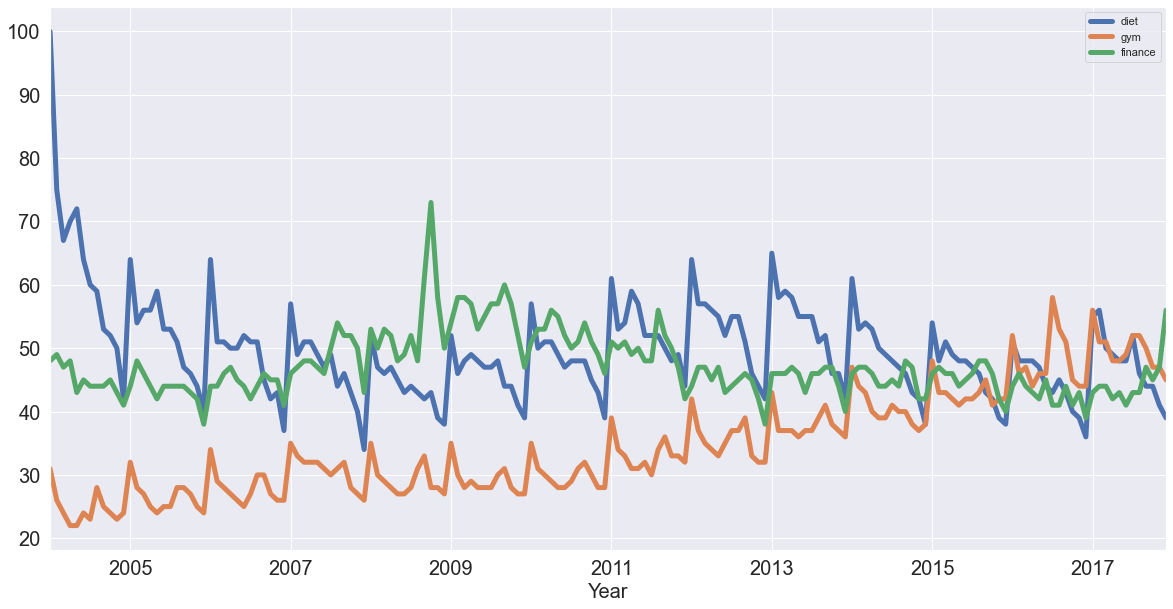

In [31]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

Gym is increasing through years. Finance has peak between 2007 to 2009, then decrease.

In [42]:
#trends and seasonality 
diet=data[['diet']]

Text(0.5, 0, 'Year')

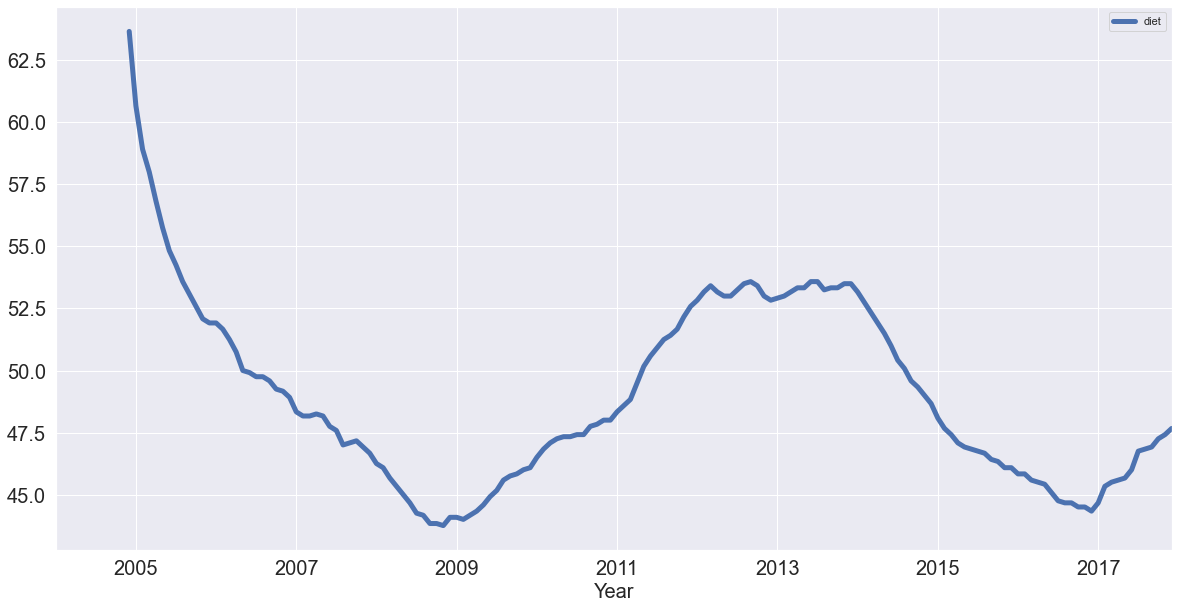

In [43]:
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

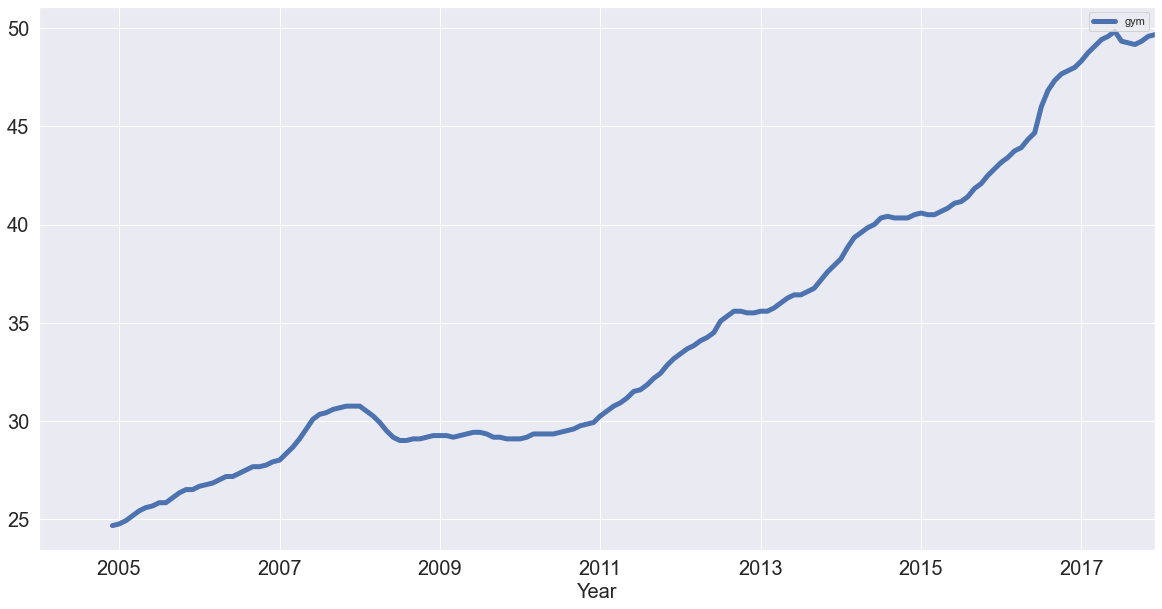

In [44]:
gym=data[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

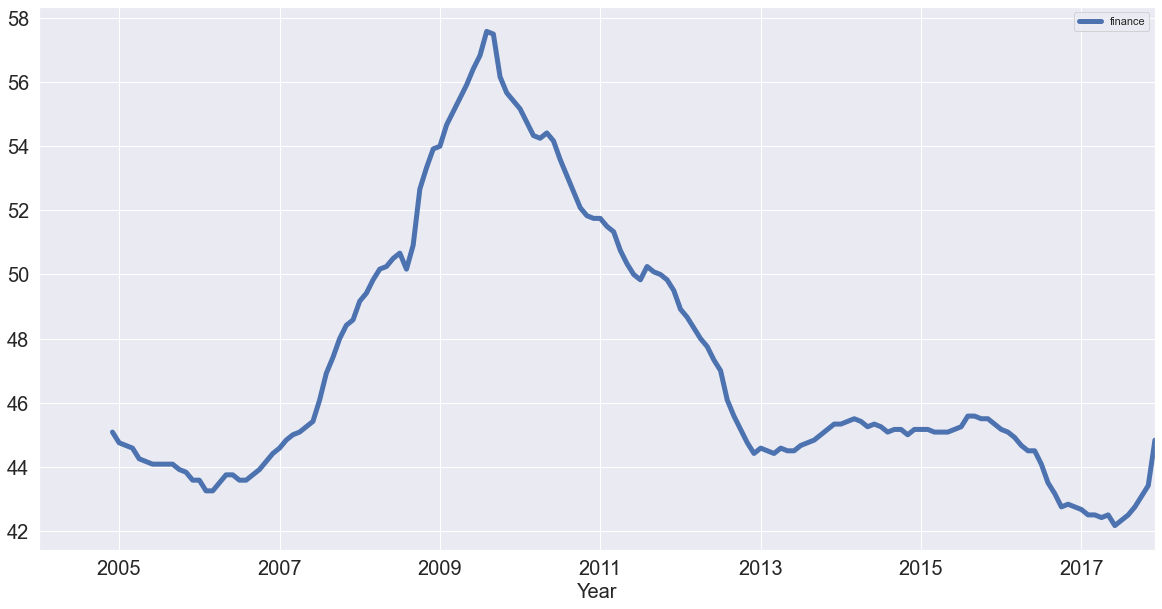

In [45]:
finance=data[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

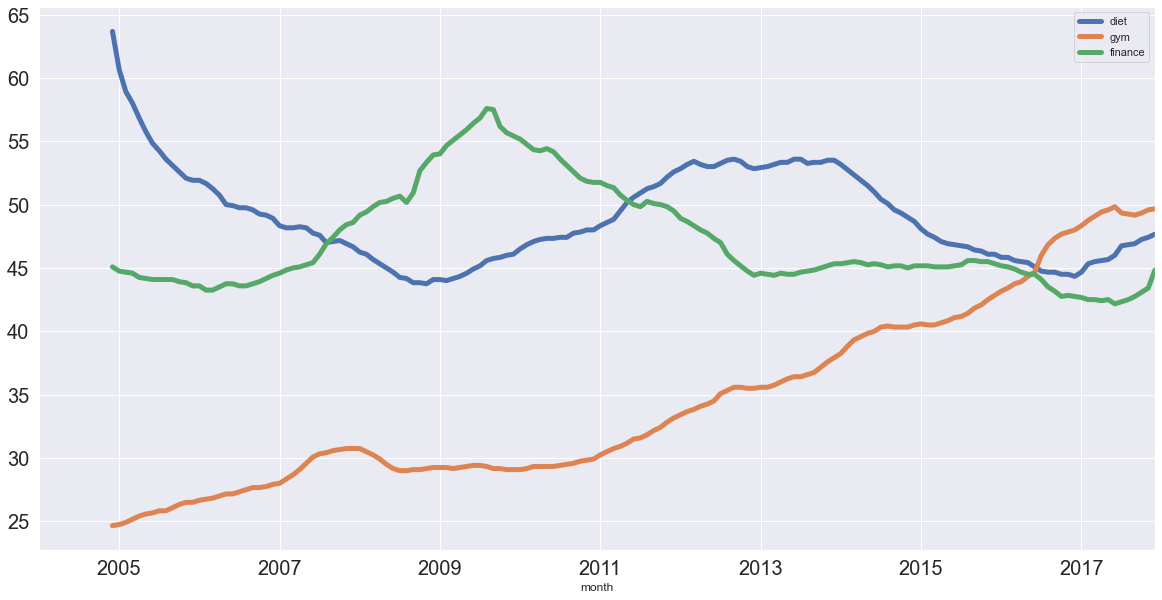

In [46]:
#let's plot them together to compare 
df_rm=pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(), 
                 finance.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [47]:
data.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5, 0, 'Year')

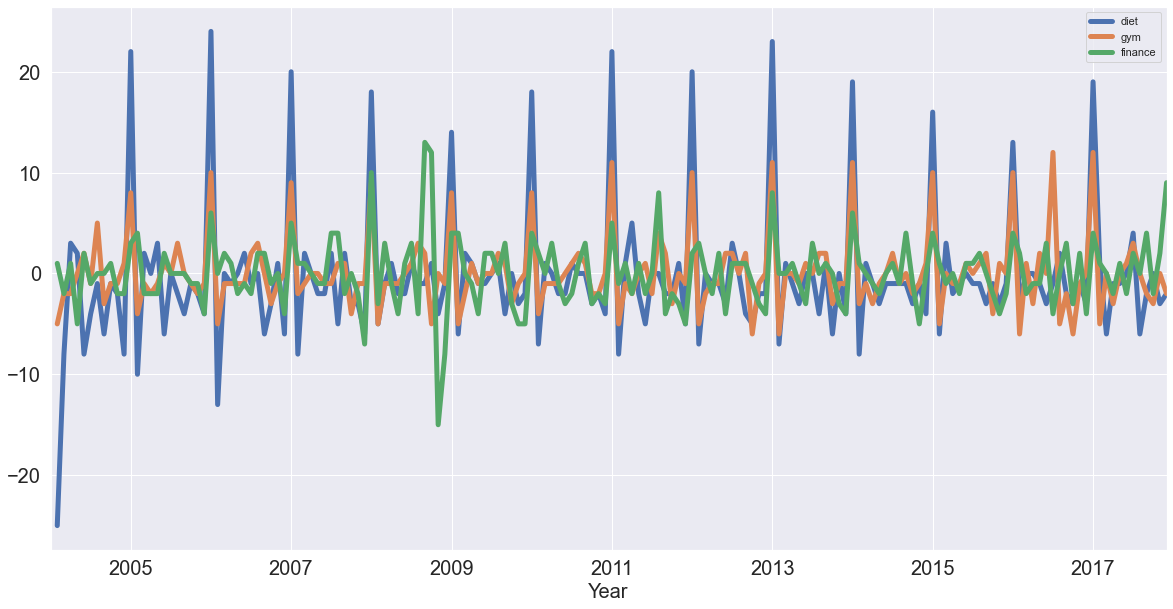

In [49]:
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

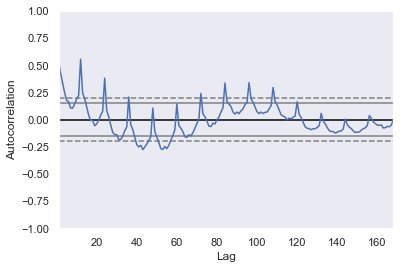

In [50]:
pd.plotting.autocorrelation_plot(diet)

The seasonality of this is 12 month repetition. 

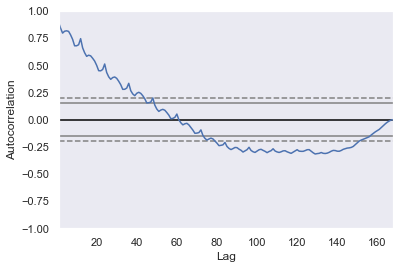

In [51]:
pd.plotting.autocorrelation_plot(gym)

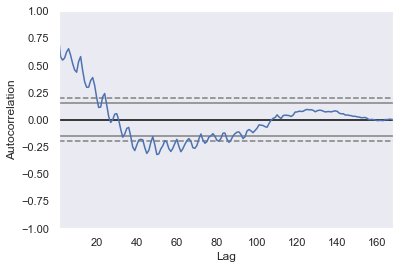

In [53]:
pd.plotting.autocorrelation_plot(finance)